# NFL Match Data - Super Bowl History

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv("Data/processed_game_history.csv", parse_dates=["Date"])
df = df.drop(["Unnamed: 0", "AtHome"], axis=1)

In [170]:
sb_games = df[df["Week"] == "Super Bowl"]
sb_games = sb_games.drop("Week", axis=1)

In [171]:
print(f"Number of Super Bowl games that have been played: {sb_games.shape[0]}")
print(f"Number of Super Bowls played in January: {len(sb_games[sb_games['Date'].dt.month == 1])}")
print(f"Number of Super Bowls played in February: {len(sb_games[sb_games['Date'].dt.month == 2])}")
print(f"Number of Super Bowls played in March: {len(sb_games[sb_games['Date'].dt.month == 3])}")

Number of Super Bowl games that have been played: 55
Number of Super Bowls played in January: 36
Number of Super Bowls played in February: 19
Number of Super Bowls played in March: 0


In [172]:
print(f"Largest Super Bowl win margin: {sb_games['PtsMargin'].max()} pts")
print(f"Smallest Super Bowl win margin: {sb_games['PtsMargin'].min()} pts")
print(f"Average Super Bowl win margin: {sb_games['PtsMargin'].mean():.2f} pts")

Largest Super Bowl win margin: 45 pts
Smallest Super Bowl win margin: 1 pts
Average Super Bowl win margin: 14.05 pts


In [174]:
sb_games["PtsTotal"] = sb_games["PtsW"] + sb_games["PtsL"]
sb_games["YdsTotal"] = sb_games["YdsW"] + sb_games["YdsL"]
sb_games.head()

,Rk,Day,Date,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,HomeTeam,Season,PtsMargin,TieGame,ModifiedWeek,PtsTotal,YdsTotal
183,184,Sun,2002-02-03,New England Patriots,St. Louis Rams,20,17,267.0,0.0,427.0,3.0,New England Patriots,2001,3,0,21,37,694.0
670,177,Sun,2008-02-03,New York Giants,New England Patriots,17,14,338.0,1.0,274.0,1.0,New York Giants,2007,3,0,21,31,612.0
1327,112,Sun,2005-02-06,New England Patriots,Philadelphia Eagles,24,21,331.0,1.0,369.0,4.0,New England Patriots,2004,3,0,21,45,700.0
1531,19,Sun,1971-01-17,Baltimore Colts,Dallas Cowboys,16,13,329.0,7.0,217.0,4.0,Baltimore Colts,1970,3,0,17,29,546.0
1904,114,Sun,2016-02-07,Denver Broncos,Carolina Panthers,24,10,194.0,2.0,315.0,4.0,Denver Broncos,2015,14,0,21,34,509.0


## Points Margin Through Time

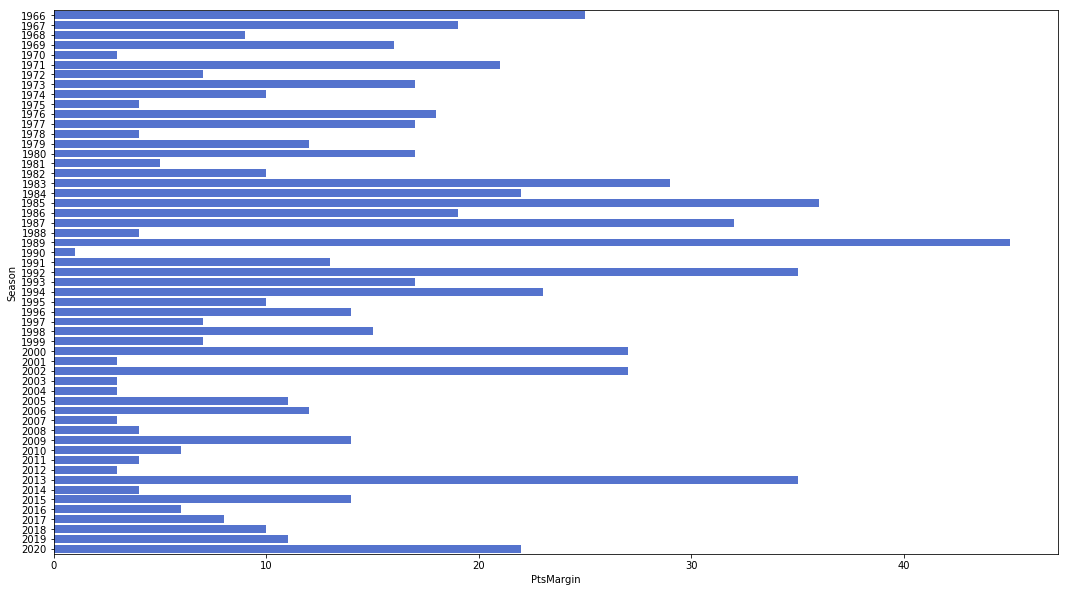

In [58]:
plt.subplots(figsize=(18, 10))
sns.barplot(data=sb_games, y="Season", x="PtsMargin", color="royalblue", orient="h")

#### Historic Distribution

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Proportion of all Super Bowl Games')

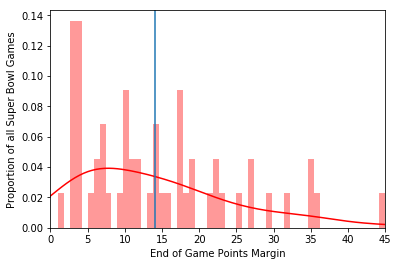

In [80]:
max_diff = sb_games["PtsMargin"].max()
sb_count = len(sb_games)
sns.distplot(sb_games["PtsMargin"], color="red", bins=sb_count).set_xlim(0, max_diff)
plt.axvline(x=sb_games["PtsMargin"].mean())
plt.xlabel("End of Game Points Margin")
plt.ylabel("Proportion of all Super Bowl Games")

### Historic Points Total

#### Total Points Scored Distribution

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Proportion of all Super Bowl Games')

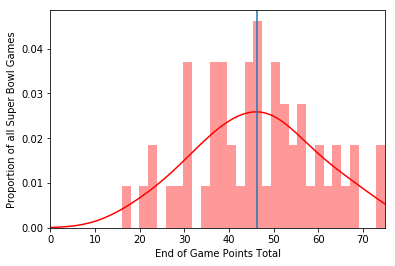

In [84]:
max_pts_total= sb_games["PtsTotal"].max()
sns.distplot(sb_games["PtsTotal"], color="red", bins=30).set_xlim(0, max_pts_total)
plt.axvline(x=sb_games["PtsTotal"].mean())
plt.xlabel("End of Game Points Total")
plt.ylabel("Proportion of all Super Bowl Games")

#### Top Ten Highest and Lowest Scoring Super Bowls

Text(0.5, 1.0, 'Top 10 Lowest Total Scores')

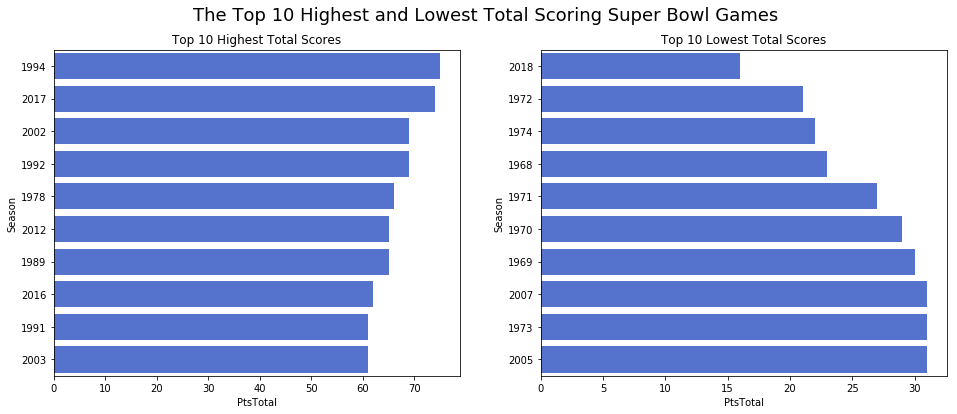

In [191]:
high_total_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsTotal"]].nlargest(n=10, columns=["PtsTotal"])
low_total_rank = sb_games[["Season", "Winner/tie", "Loser/tie", "PtsTotal"]].nsmallest(n=10, columns=["PtsTotal"])
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
plt.suptitle("The Top 10 Highest and Lowest Total Scoring Super Bowl Games", fontsize=18)
sns.barplot(data=high_total_rank, x="PtsTotal", y="Season", order=high_total_rank["Season"], color="royalblue", orient="h", ax=ax[0])
sns.barplot(data=low_total_rank, x="PtsTotal", y="Season", order=low_total_rank["Season"], color="royalblue", orient="h", ax=ax[1])
ax[0].set_title("Top 10 Highest Total Scores")
ax[1].set_title("Top 10 Lowest Total Scores")

#### Total Points Scored Through Time

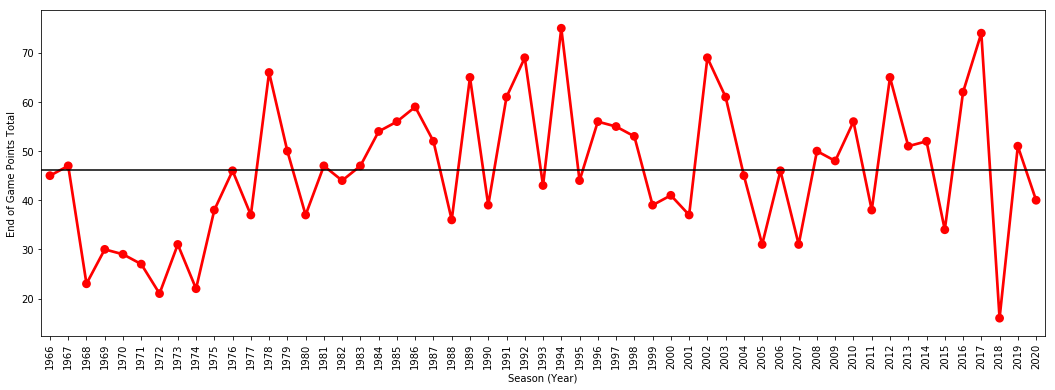

In [155]:
plt.subplots(figsize=(18,6))
sns.pointplot(sb_games["Season"], sb_games["PtsTotal"], color="red")
plt.axhline(sb_games["PtsTotal"].mean(), color="black")
plt.xlabel("Season (Year)")
plt.ylabel("End of Game Points Total")
_ = plt.xticks(rotation=90)

In [103]:
import statsmodels.api as sm
results = sm.OLS(sb_games["PtsTotal"], sb_games["Season"]).fit()
if results.pvalues[0] < 0.05:
    print("The Season and the TotalPoints have a statistically significant relationship.")
print(f"Proportion of variance explained: {results.rsquared:.3f}")

The Season and the TotalPoints have a statistically significant relationship.
Proportion of variance explained: 0.920


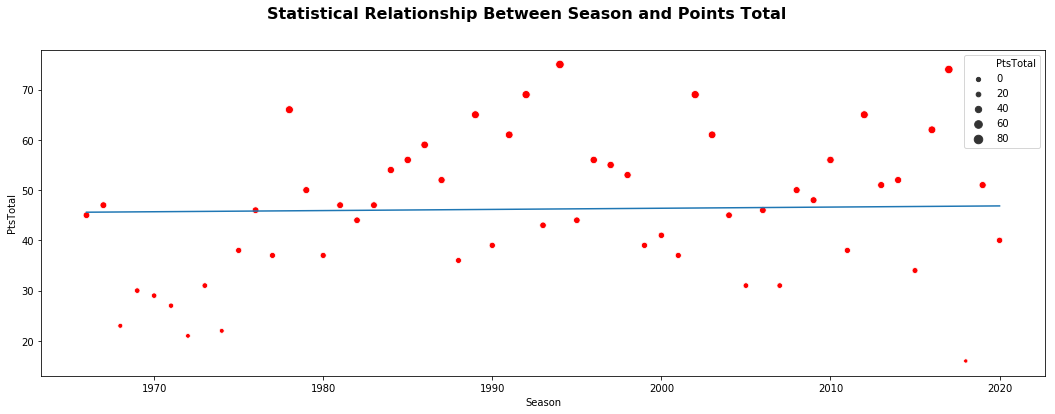

In [166]:
plt.subplots(figsize=(18,6))
plt.suptitle("Statistical Relationship Between Season and Points Total", fontweight="bold", fontsize=16)
sns.scatterplot(sb_games["Season"], sb_games["PtsTotal"], size=sb_games["PtsTotal"], color="red")
sns.lineplot(sb_games["Season"], results.fittedvalues)

## Historic Yards Gained at SuperBowl

### Total Yards Gained

/Users/alessiomorteo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Proportion of all Super Bowl Games')

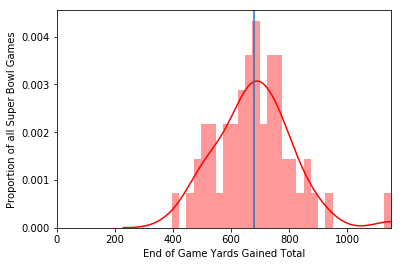

In [176]:
max_yds_total= sb_games["YdsTotal"].max()
sns.distplot(sb_games["YdsTotal"], color="red", bins=30).set_xlim(0, max_yds_total)
plt.axvline(x=sb_games["YdsTotal"].mean())
plt.xlabel("End of Game Yards Gained Total")
plt.ylabel("Proportion of all Super Bowl Games")

### Winner Net Yards

Text(0, 0.5, 'Proportion of all Super Bowl Games')

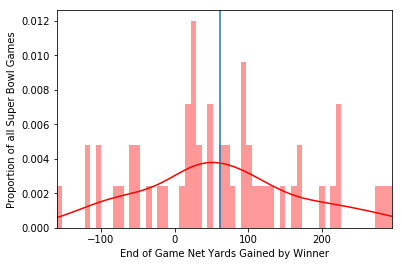

In [182]:
sb_games["NetYdsWinner"] = sb_games["YdsW"] - sb_games["YdsL"]
net_yds_winner_low, net_yds_winner_high = sb_games["NetYdsWinner"].min(), sb_games["NetYdsWinner"].max()
sns.distplot(sb_games["NetYdsWinner"], color="red", bins=60).set_xlim(net_yds_winner_low, net_yds_winner_high)
plt.axvline(x=sb_games["NetYdsWinner"].mean())
plt.xlabel("End of Game Net Yards Gained by Winner")
plt.ylabel("Proportion of all Super Bowl Games")